## Observations and Insights 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combo=mouse_metadata.merge(study_results,on="Mouse ID")
# Display the data table for preview
combo.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
for mouse in mouse_metadata["Mouse ID"]:
    for tp in np.arange(0,45,5):
        if combo[(combo["Mouse ID"]==mouse)&(combo["Timepoint"]==tp)].size>8:
            print(mouse)



g989
g989
g989
g989
g989


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
combo[combo["Mouse ID"]=="g989"]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [7]:
# Checking the number of mice in the clean DataFrame.


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
regimenDF=combo.groupby("Drug Regimen")
mean=regimenDF["Tumor Volume (mm3)"].mean()
mean=mean.rename("mean tumor volume")
median=regimenDF["Tumor Volume (mm3)"].median()
median=median.rename("median tumor volume")
variance=regimenDF["Tumor Volume (mm3)"].var()
variance=variance.rename("tumor volume variance")
deviation=regimenDF["Tumor Volume (mm3)"].std()
deviation=deviation.rename("tumor volume standard deviation")
error=regimenDF["Tumor Volume (mm3)"].sem()
error=error.rename("tumor volume standard error")

regimenSum=pd.concat([mean,median,variance,deviation,error],axis=1)
regimenSum


,mean tumor volume,median tumor volume,tumor volume variance,tumor volume standard deviation,tumor volume standard error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice')

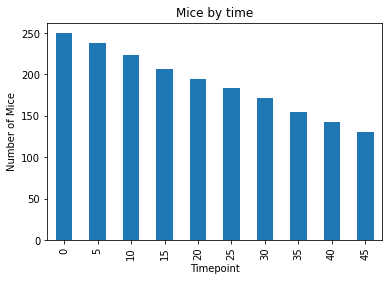

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
numberOfMice=combo.groupby("Timepoint")
numberOfMice=numberOfMice["Mouse ID"].count()
numberOfMice.plot.bar(title="Mice by time")
plt.ylabel("Number of Mice")


Text(0, 0.5, 'Number of Mice')

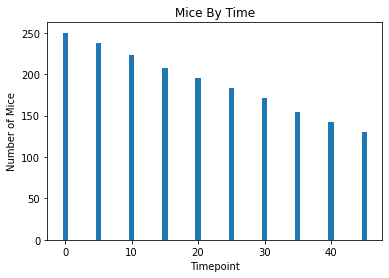

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
numberOfMice=combo.groupby("Timepoint")
numberOfMice=numberOfMice.count()
plt.bar(numberOfMice.index,numberOfMice["Mouse ID"])

plt.title("Mice By Time")
plt.xlabel("Timepoint")
plt.ylabel("Number of Mice")

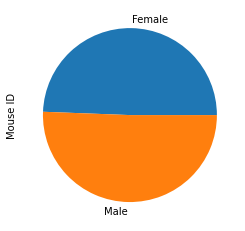

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
miceSex=combo.groupby("Sex")
miceSex=miceSex["Mouse ID"].count()
miceSex.plot(kind="pie",title="")


([<matplotlib.patches.Wedge at 0x299907c0e80>,
 [Text(0.02099250347258556, 1.0997996703027118, 'Female'),
  Text(-0.020992503472586185, -1.0997996703027118, 'Male')])

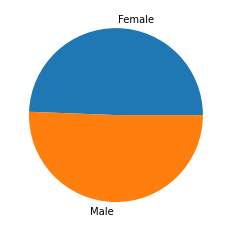

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
miceSex=combo.groupby("Sex")
miceSex=miceSex["Mouse ID"].count()
plt.pie(miceSex,labels=miceSex.index)


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
